('Horizontal range is:', 139606.18891717546, 'meters')
('Maximum altitude reached is:', 197937.66657592784, 'meters')
('Time in the air is:', 401.9799999997794, 'seconds')
('Horizontal range is:', 145610.9429008821, 'meters')
('Maximum altitude reached is:', 204283.62904314534, 'meters')
('Time in the air is:', 419.2699999997637, 'seconds')


Text(0,0.5,u'Altitude (m)')

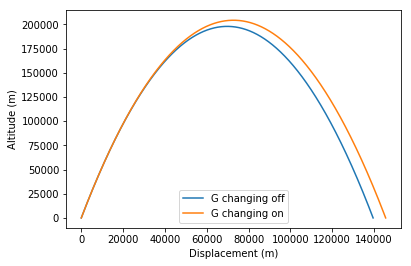

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# A function that returns trajectory of a projectile
# given initial velocity - v and angle - theta in degrees.
# Returns matching arrays x_coord, and y_coord.
def projectile(v, theta,wantdrag,changingG):
    # Physical constants in meters
    Rearth = 6371000
    # Initial conditions
    t = 0
    x = 0
    y = 0
    theta = np.deg2rad(theta) # Degrees converted to radians
    vx = v*np.cos(theta)
    vy = v*np.sin(theta)
    # Time step in seconds
    dt = 0.01
    # Let's savey all x and y values in an array
    x_array = np.array([x])
    y_array = np.array([y])

    # Evolve the projectile in time until it hits the ground
    while y >= 0:
        # Gravity
        ax = 0 # No acceleration in x
        ay = -9.8 # g in m/s^2
        # Changing gravity with altitude. Only compute if user requests
        if changingG == True:
            ay *= (Rearth)**2/(Rearth + y)**2
        # Drag. Only compute if user requests
        if wantdrag == True:
            ad = -0.0004*(vx**2 + vy**2)
            costheta = vx/np.sqrt(vx**2 + vy**2)
            sintheta = vy/np.sqrt(vx**2 + vy**2)
            adx = ad*costheta
            ady = ad*sintheta
            ax += adx
            ay += ady
        # Now evolve
        x = x + vx*dt
        y = y + vy*dt
        vx = vx + ax*dt
        vy = vy + ay*dt
        t = t + dt
        # Append new value to the array
        x_array = np.append(x_array,x)
        y_array = np.append(y_array,y)
    
    # Print some info
    print('Horizontal range is:', np.max(x_array), 'meters')
    print('Maximum altitude reached is:', np.max(y_array), 'meters')
    print('Time in the air is:', t, 'seconds')
    
    return [x_array, y_array]

[x1,y1] = projectile(2000,80,False,False)
[x2,y2] = projectile(2000,80,False,True)

# Plot the trajectory
plt.plot(x1,y1,label='G changing off')
plt.plot(x2,y2,label='G changing on')
plt.legend()
plt.xlabel('Displacement (m)')
plt.ylabel('Altitude (m)')